<img src= "MSTS_Logo.png" style ="width:400px;height:400px"/>

# Time series in Pandas

Time Series charts will be instrumental in our financial analysis to plot prices, ratios and other metrics overtime. It is important we learn how to manipulate time series data to best suit our needs.

## DateTime Index
Often the time and date info will be the actual index of our dataframe. We need to know hwo to work with this date time index

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from datetime import datetime

In [5]:
# To illustrate the order of arguments
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [6]:
# January 2nd, 2017
my_date = datetime(my_year,my_month,my_day)
# Defaults to 0:00
my_date 

datetime.datetime(2017, 1, 2, 0, 0)

In [7]:
# January 2nd, 2017 at 13:30:15
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [8]:
type(my_date_time)

datetime.datetime

In [11]:
my_date_time.day

2

In [12]:
my_date_time.month

1

In [13]:
my_date_time.hour

13

### Pandas with Datetime Index

You'll usually deal with time series as an index when working with pandas dataframes obtained from some sort of financial API. Fortunately pandas has a lot of functions and methods to work with time series!

You can create your own table with dates as the index using the following steps

In [14]:
# Create an example datetime list/array
first_two = [datetime(2016, 1, 1), datetime(2016, 1, 2)]
first_two

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0)]

In [15]:
# Converted to an index
dt_ind = pd.DatetimeIndex(first_two)
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [16]:
# Attached to some random data
data = np.random.randn(2,2)
print(data)

[[0.64876744 0.27819998]
 [0.27078711 0.59080251]]


In [19]:
cols = ['A','B']
df = pd.DataFrame(data,dt_ind,cols)

In [18]:
df

,A,B
2016-01-01,0.648767,0.278200
2016-01-02,0.270787,0.590803


# Time Resampling

Let's learn how to sample time series data! This will be useful later on in the course!

In [20]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('walmart_stock.csv')

In [31]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [33]:
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [37]:
df.set_index('Date')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087


In [36]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [39]:
#OR
df = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates = True)

In [40]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [ ]:
#Parse dates does its best

In [42]:
df.resample(rule = 'A')

## resample()

A common operation with time series data is resamplling based on the time series index. Let see how to use the resample() method.

#### All possible time series offest strings

<table border="1" class="docutils">
<colgroup>
<col width="13%" />
<col width="87%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Alias</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>B</td>
<td>business day frequency</td>
</tr>
<tr class="row-odd"><td>C</td>
<td>custom business day frequency (experimental)</td>
</tr>
<tr class="row-even"><td>D</td>
<td>calendar day frequency</td>
</tr>
<tr class="row-odd"><td>W</td>
<td>weekly frequency</td>
</tr>
<tr class="row-even"><td>M</td>
<td>month end frequency</td>
</tr>
<tr class="row-odd"><td>SM</td>
<td>semi-month end frequency (15th and end of month)</td>
</tr>
<tr class="row-even"><td>BM</td>
<td>business month end frequency</td>
</tr>
<tr class="row-odd"><td>CBM</td>
<td>custom business month end frequency</td>
</tr>
<tr class="row-even"><td>MS</td>
<td>month start frequency</td>
</tr>
<tr class="row-odd"><td>SMS</td>
<td>semi-month start frequency (1st and 15th)</td>
</tr>
<tr class="row-even"><td>BMS</td>
<td>business month start frequency</td>
</tr>
<tr class="row-odd"><td>CBMS</td>
<td>custom business month start frequency</td>
</tr>
<tr class="row-even"><td>Q</td>
<td>quarter end frequency</td>
</tr>
<tr class="row-odd"><td>BQ</td>
<td>business quarter endfrequency</td>
</tr>
<tr class="row-even"><td>QS</td>
<td>quarter start frequency</td>
</tr>
<tr class="row-odd"><td>BQS</td>
<td>business quarter start frequency</td>
</tr>
<tr class="row-even"><td>A</td>
<td>year end frequency</td>
</tr>
<tr class="row-odd"><td>BA</td>
<td>business year end frequency</td>
</tr>
<tr class="row-even"><td>AS</td>
<td>year start frequency</td>
</tr>
<tr class="row-odd"><td>BAS</td>
<td>business year start frequency</td>
</tr>
<tr class="row-even"><td>BH</td>
<td>business hour frequency</td>
</tr>
<tr class="row-odd"><td>H</td>
<td>hourly frequency</td>
</tr>
<tr class="row-even"><td>T, min</td>
<td>minutely frequency</td>
</tr>
<tr class="row-odd"><td>S</td>
<td>secondly frequency</td>
</tr>
<tr class="row-even"><td>L, ms</td>
<td>milliseconds</td>
</tr>
<tr class="row-odd"><td>U, us</td>
<td>microseconds</td>
</tr>
<tr class="row-even"><td>N</td>
<td>nanoseconds</td>
</tr>
</tbody>
</table>

In [44]:
# Yearly Means
df.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [45]:
df.resample(rule='A').max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


In [46]:
def first_day(entry):
    return entry[0]


In [47]:
df.resample('A').apply(first_day)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


<AxesSubplot:xlabel='Date'>

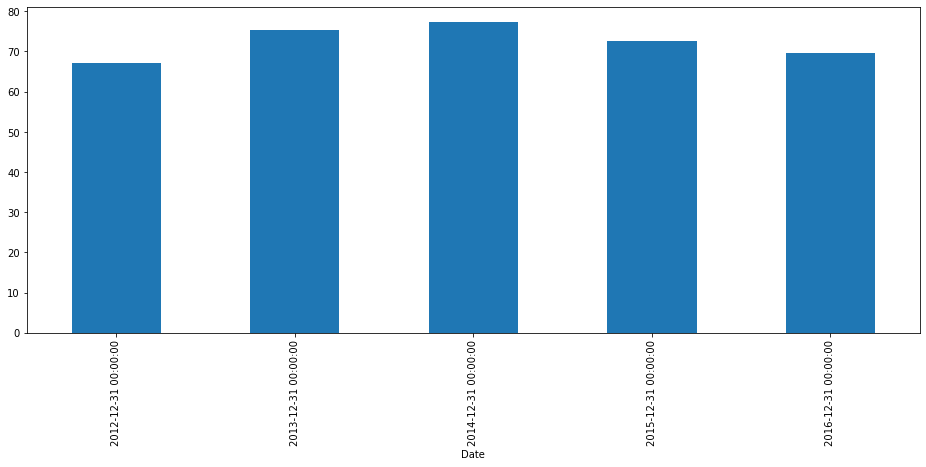

In [49]:
df['Close'].resample('A').mean().plot(kind = 'bar', figsize = (16,6))

### See you in the next one!

### - Your MSTS team